Mit einer Dimensionsreduktion wird versucht, den Informationsgehalt hochdimensionaler Daten (d.h. viele Spalten) auf wenige Spalten abzubilden. In dieser Aufgabe soll mit t-SNE ein Vertreter der nicht-linearen Techniken untersucht werden.


### Teilaufgabe 1
Laden Sie den digits Datensatz von sklearn. Beschränken Sie sich auf die Zahlen 0,1,...,5. Wenden Sie nun eine [ t-SNE ](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) an mit Parameter n_components=2. Visualisieren Sie die beiden neu erzeugten Spalten in einem Scatterplot und färben Sie die jeweiligen Punktpaare gemäß der auf diesem Bild dargestellten Zahl ein.

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
images = digits["images"]  # 1083 Bilder der Größe 8x8 Pixel
target = digits["target"]  # Die auf den Bildern gezeigten Zahlen (0,...,5), Array der Länge 1083
data   = digits["data"]    # Die Bilder nochmals jeweils als "flacher" Datenvektor der Länge 64 
np.unique(target)


array([0, 1, 2, 3, 4, 5])

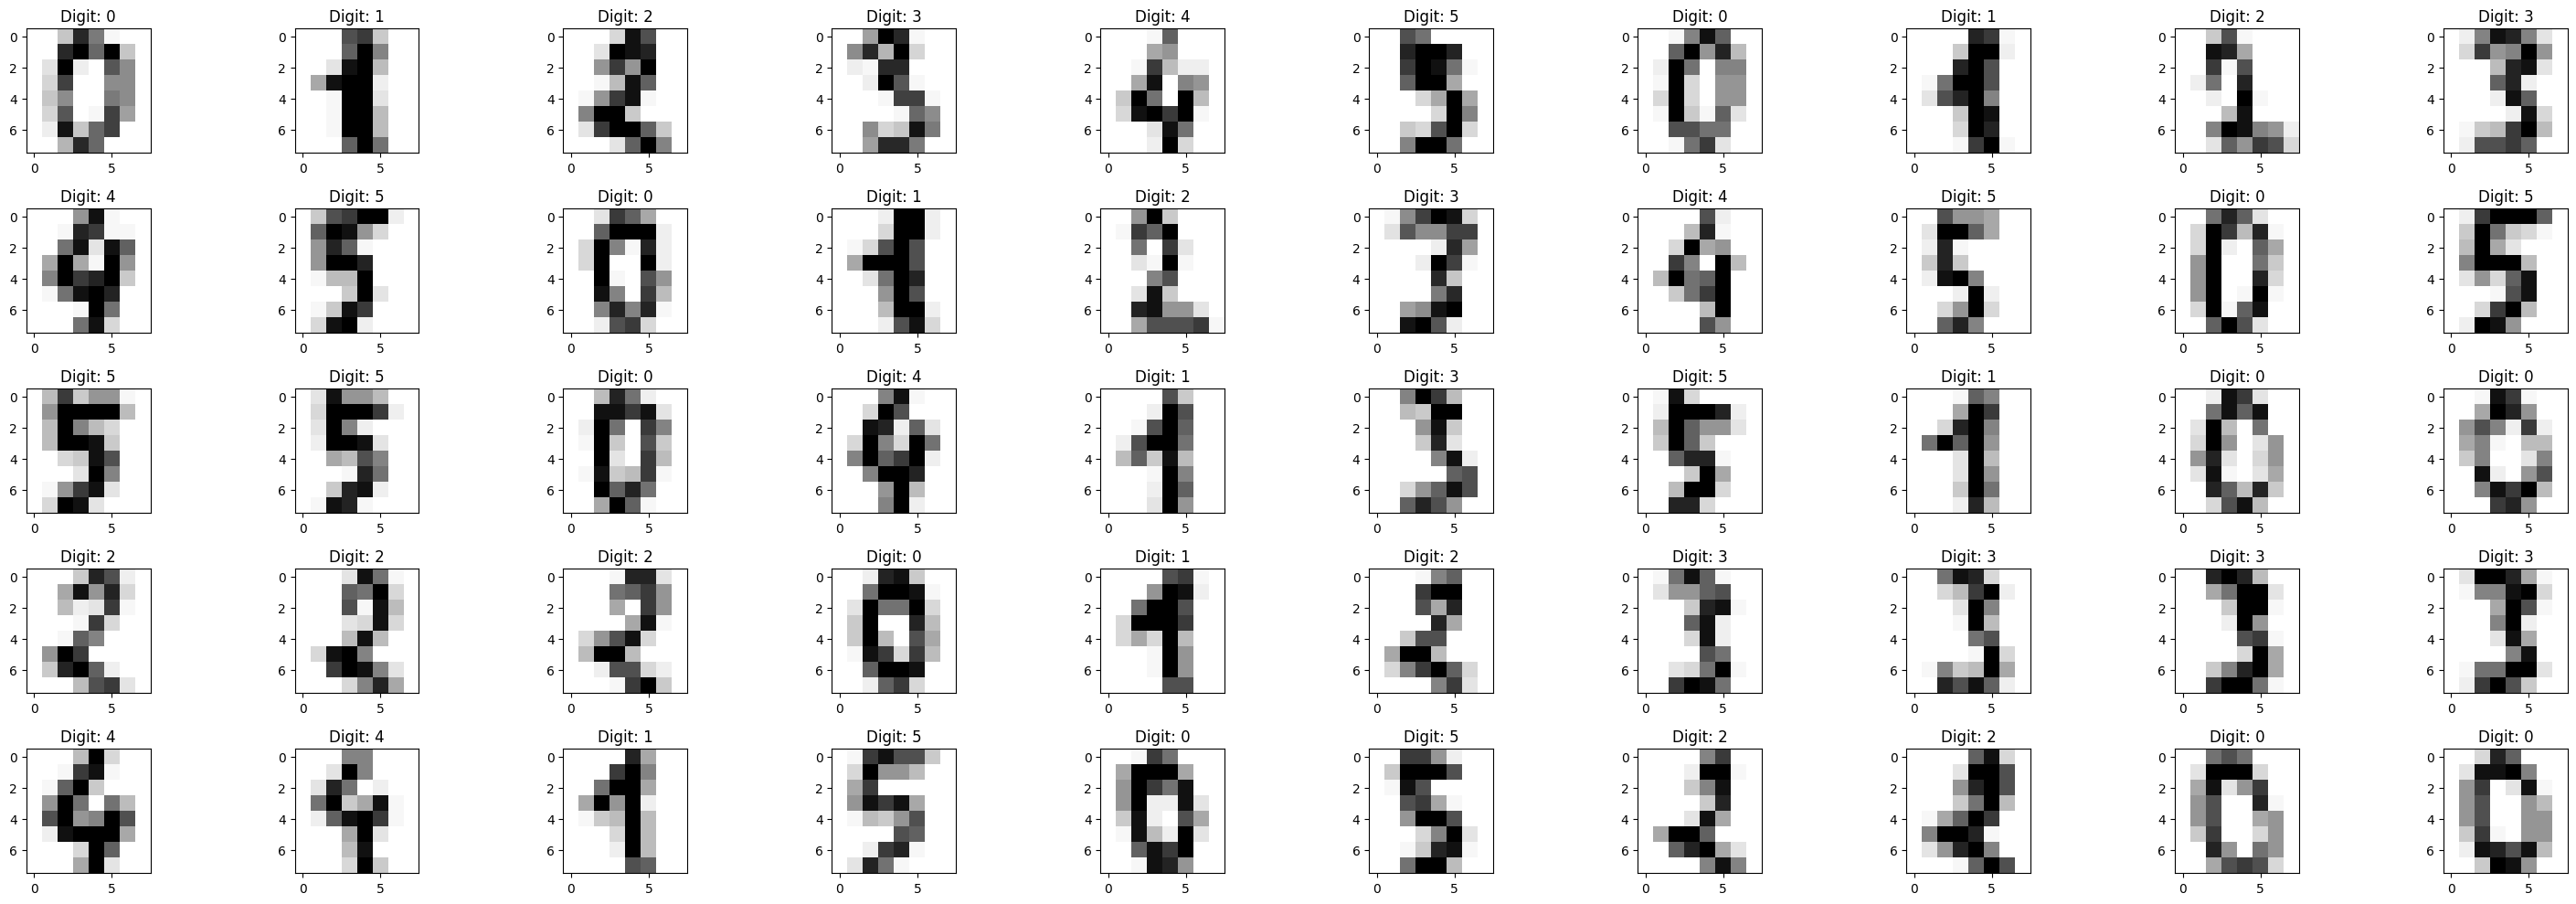

In [81]:

fig, axes = plt.subplots(5,10, figsize=(30,10))


for ax, image, digit in zip(axes.flatten(), images[0:50], target[0:50]):
	ax.set_title("Digit: %i" % digit)
	ax.imshow(image, cmap="Greys")
plt.tight_layout()


In [82]:
data.shape

(1083, 64)

In [83]:
from sklearn.manifold import TSNE
import pandas as pd

tse = TSNE(n_components=2, random_state=0, learning_rate="auto", init="random")
data_2d = tse.fit_transform(data)
data_2d.shape

(1083, 2)

In [84]:
df = pd.DataFrame(data_2d, columns=tse.get_feature_names_out())
df["target"] = target
df

,tsne0,tsne1,target
0,38.787781,8.940082,0
1,3.437743,-4.565454,1
2,-2.939912,15.484236,2
3,-34.401543,7.728079,3
4,14.250997,-25.028866,4
...,...,...,...
1078,-32.090652,-14.616015,5
1079,-35.371140,-15.709117,5
1080,16.037821,-27.781540,4
1081,13.962152,-30.050388,4


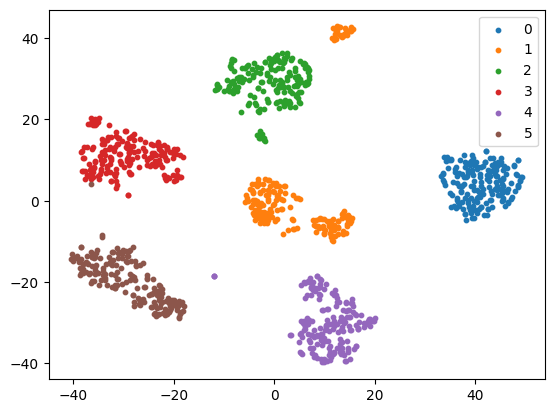

In [88]:
for digit in np.unique(target):
	df["digit_%i" % digit] = (target == digit).astype(int)
	df_digit = df[df["target"] == digit]
	plt.scatter(df_digit["tsne0"], df_digit["tsne1"], label=digit, s=10)

plt.legend()

### Teilaufgabe 2
Der t-SNE-Algorithmus kann mittels eines Hyperparameters perplexity im Konstruktor angepasst werden. Der Default-Wert ist 30. Erstellen Sie die Grafik aus 1. nochmals für die Perplexity-Werte 2,3,4,5,10,30,50.

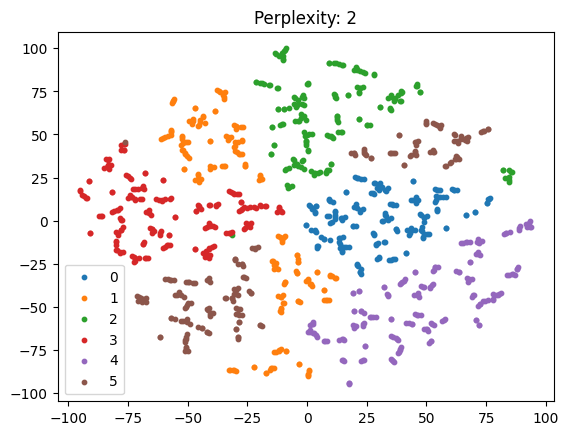

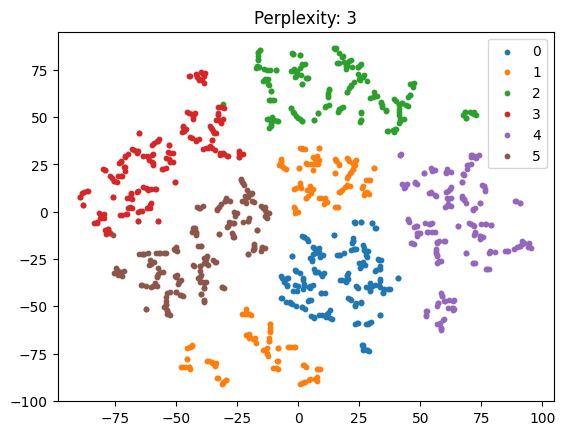

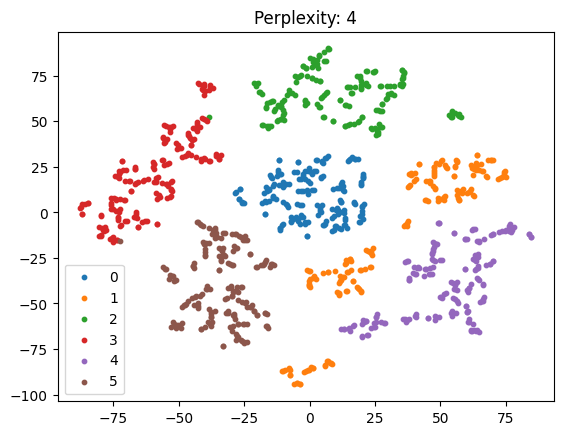

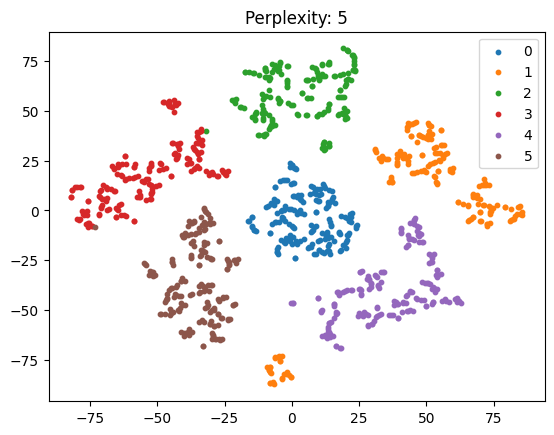

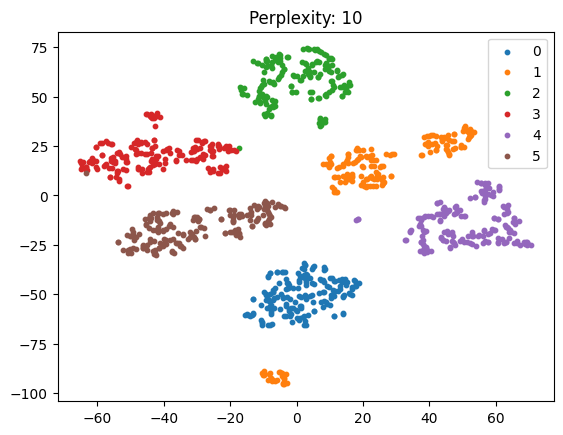

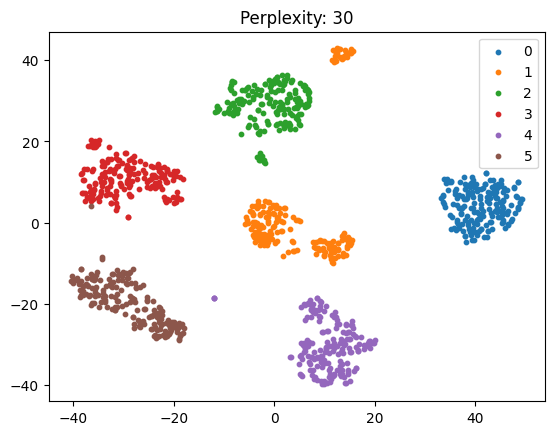

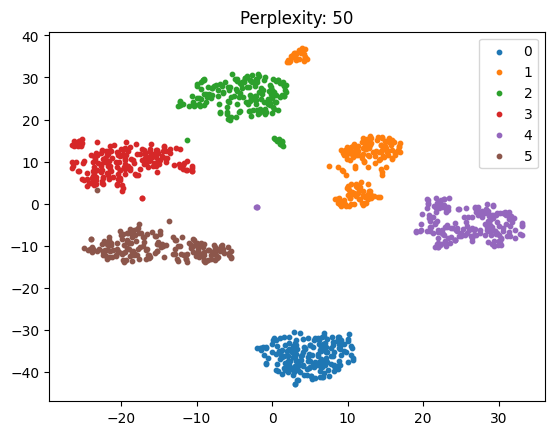

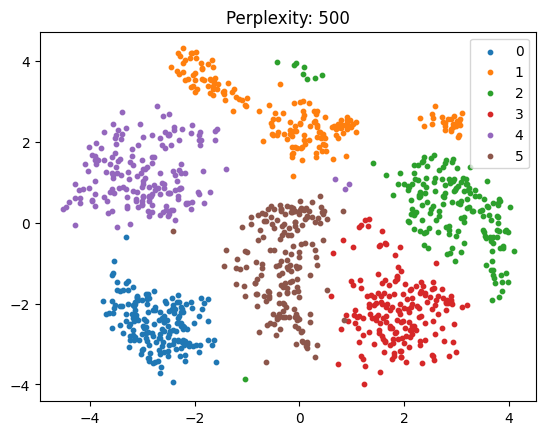

In [ ]:

for perplexity in [2,3,4,5,10,30,50,500]:
	tse = TSNE(n_components=2, random_state=0, perplexity=perplexity, learning_rate="auto", init="random")
	data_2d = tse.fit_transform(data)
	data_2d.shape

	df = pd.DataFrame(data_2d, columns=tse.get_feature_names_out())
	df["target"] = target


	for digit in np.unique(target):
		df["digit_%i" % digit] = (target == digit).astype(int)
		df_digit = df[df["target"] == digit]
		plt.scatter(df_digit["tsne0"], df_digit["tsne1"], label=digit, s=10)

	plt.title("Perplexity: %i" % perplexity)
	plt.legend()
	plt.show()